In [1]:
import numpy as np 
import pandas as pd 
import yfinance as yf
import plotly.express as px
from tqdm.notebook import tqdm
import plotly.graph_objects as go
from ipywidgets import interact

In [2]:
from investors import * 

In [3]:
tickers = ['SPY','IWV','QQQ']

etf_stocks = {}
for ticker in tickers: 
    msft = yf.Ticker(ticker)
    info = msft.info
    # get historical market data
    etf_stocks[ticker] = msft.history(period="34y")
    etf_stocks[ticker]['date'] = etf_stocks[ticker].index
    etf_stocks[ticker]['YM'] = etf_stocks[ticker]['date'].apply(lambda v: v.strftime("%Y-%m"))
    etf_stocks[ticker]['Y'] = etf_stocks[ticker]['date'].apply(lambda v: v.strftime("%Y"))

In [4]:
ticker_start_year = {'SPY':'1994',
                     'IWV':'2001',
                     'QQQ':'2000'}

symbol_to_int = {'SPY': 1994,
                 'IWV': 2001,
                 'QQQ': 2000}


for ticker,year in ticker_start_year.items():
    df = etf_stocks[ticker]
    df = df[df['Y'] >=year]
    etf_stocks[ticker] = etf_stocks[ticker][(etf_stocks[ticker]['Y']>=year) &
                                            (etf_stocks[ticker]['Y']<'2023')]
    etf_stocks[ticker]['symbol'] = symbol_to_int[ticker]
    print(ticker,etf_stocks[ticker]['YM'].min(),etf_stocks[ticker]['YM'].max())
    

SPY 1994-01 2022-12
IWV 2001-01 2022-12
QQQ 2000-01 2022-12


In [8]:
initial_deposit = 0
shares_to_buy = 5
amount_to_deposit_monthly = 1_000
fixed_amount = amount_to_deposit_monthly
ticker = 'SPY'
verbose = False

lucky_investor = fixedAmountLuckyInvestor('lucky',initial_deposit,verbose=True)
unlucky_investor = fixedAmountUnluckyInvestor('unlucky',initial_deposit,verbose=True)
som_investor = fixedAmountSomInvestor('som',initial_deposit,verbose=True)
random_investor = fixedAmountRandomInvestor('random',initial_deposit,verbose=True)
investors = [lucky_investor,unlucky_investor,som_investor,random_investor]

dfs = etf_stocks[ticker].rename(columns={'Close':'price'})
dfs = dfs[dfs['Y'] <'2021']

dfs = dfs.sort_values('date').reset_index(drop=True)
dfs['YM'] = dfs['date'].apply(lambda v: v.strftime('%Y'))
yms = np.sort(dfs['YM'].unique())
pbar = tqdm(yms)
for ym in pbar:
    pbar.set_description("Processing %s" % ym)
    dfym = dfs[dfs['YM'] == ym]
    
    for investor in investors:
        investor.depositMoney(amount_to_deposit_monthly)
        
    dfym_symbol = dfym#[dfym['symbol'] == symbol]
    if dfym_symbol.shape[0] == 0:
        continue
    for investor in investors:
        investor.buyLogic(dfym_symbol,shares=shares_to_buy,stock_amount=fixed_amount)
        
    symbols_and_prices = dfym.groupby(['symbol'],as_index=False)['date'].max()
    symbols_and_prices = symbols_and_prices.merge(dfym,on=['symbol','date'])
    stocks = {}
    for i,(symbol,price,date) in symbols_and_prices[['symbol','price','date']].iterrows():
        stocks[int(symbol)] = price
        stocks['date'] = date
        
    for investor in investors:
        investor.updatePortfolio(stocks)
        investor.calculateProfit(stocks)

        
        
if verbose: 
    fig = go.Figure()

    for investor in investors:
        fig.add_trace(go.Scatter(x=yms, y=investor.portfolio,
                                 name=investor.name))

    fig.update_layout(hovermode='x unified')
    fig.show()   

    fig = go.Figure()

    for investor in investors:
        fig.add_trace(go.Scatter(x=yms, y=investor.transaction_history['price'],
                                 name=investor.name))
    fig.update_layout(hovermode='x unified')
    fig.show()

    for investor in investors:
        print(investor)
        print("*"*60)

  0%|          | 0/27 [00:00<?, ?it/s]

In [13]:
investor.stock_profit

,name,as_of_date,symbol,avg_cost,current_price,profit/share,profit,pct,shares,total_value,total_cost
0,random,1994-12-30 00:00:00-05:00,1994,27.731575,27.418800,-0.312775,-11.259888,-0.01,36.0,987.076813,998.336700
1,random,1995-12-29 00:00:00-05:00,1994,31.440429,37.851357,6.410928,403.888458,0.20,63.0,2384.635460,1980.747002
2,random,1996-12-31 00:00:00-05:00,1994,33.391967,46.366951,12.974984,1154.773613,0.39,89.0,4126.658638,2971.885025
3,random,1997-12-31 00:00:00-05:00,1994,36.617202,61.888382,25.271180,2729.287430,0.69,108.0,6683.945251,3954.657822
4,random,1998-12-31 00:00:00-05:00,1994,40.420715,79.645660,39.224946,4746.218437,0.97,121.0,9637.124908,4890.906471
5,random,1999-12-31 00:00:00-05:00,1994,43.901530,95.884911,51.983380,6913.789566,1.18,133.0,12752.693108,5838.903542
6,random,2000-12-29 00:00:00-05:00,1994,47.488227,86.544228,39.056001,5585.008087,0.82,143.0,12375.824547,6790.816460
7,random,2001-12-31 00:00:00-05:00,1994,49.798875,76.367950,26.569076,4118.206764,0.53,155.0,11837.032318,7718.825554
8,random,2002-12-31 00:00:00-05:00,1994,51.621312,59.884209,8.262896,1388.166565,0.16,168.0,10060.547058,8672.380493
9,random,2003-12-31 00:00:00-05:00,1994,52.848449,76.760521,23.912072,4351.997177,0.45,182.0,13970.414810,9618.417633


In [20]:
investor.stock_profit['Y'] = investor.stock_profit['as_of_date'].apply(lambda v: v.strftime('%Y'))

AttributeError: 'Line' object has no attribute 'show'

/Users/alialnasser/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




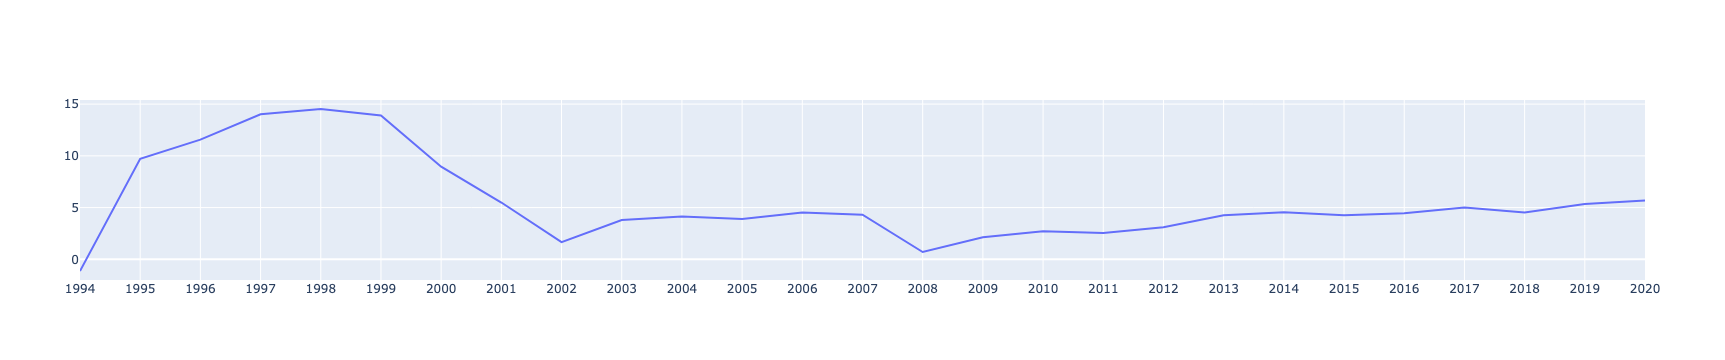

In [29]:
fig = go.Figure(go.Line(x=investor.stock_profit['Y'],y=((investor.stock_profit['total_value']/investor.stock_profit['total_cost'])**(1/(investor.stock_profit.index+1)) - 1)*100))
fig.show()

In [125]:
for investor in investors:    
    investor.stock_profit['total_value'] = investor.stock_profit['current_price']*investor.stock_profit['shares']
    investor.stock_profit['total_cost'] = investor.stock_profit['avg_cost']*investor.stock_profit['shares']
    investor.stock_profit['Y'] = investor.stock_profit['as_of_date'].apply(lambda v: v.strftime('%Y'))
    investor.transaction_history['Y'] = investor.transaction_history['YM'].apply(lambda v: v[:4])
    mdf = investor.transaction_history.merge(investor.stock_profit.drop(columns='symbol').rename(columns=lambda v: v+'_profit' if v in ['date','YM'] else v),on='Y')
    

    mdf['days'] = (mdf['as_of_date'] - mdf['date'] ).apply(lambda v: v.days)
    print("{:>7} {:>6.2f} {:>6.2f} {:>6.2f} {:>6.2f} {:>6.2f} {:>6.2f} {:>6.2f}".format(investor.name,
                                                  ((investor.stock_profit['total_value'] - investor.stock_profit['total_cost'])/investor.stock_profit['total_cost']).mean(),
                                                  ((mdf['current_price']-mdf['price'])/mdf['price']).mean(),
                                                  ((mdf['current_price']/mdf['price'])**(365/mdf['days']) - 1).mean(),
                                                  (((1+(mdf['current_price'] - mdf['price'])/mdf['price']).prod()**(1/mdf.shape[0]) - 1)*100),
                                                  (((1+(mdf['current_price'] - mdf['dca'])/mdf['dca']).prod()**(1/mdf.shape[0]) - 1)*100),                   
                                                  (((mdf['current_price']/mdf['dca']).iloc[-1])**(1/mdf.shape[0]) - 1)*100,
                                                  (((mdf['current_price']/mdf['dca']).iloc[-1])**(1/mdf.shape[0]) - 1)*100,
                                                  ((investor.stock_profit['total_value']/investor.stock_profit['total_cost']).iloc[-1]**(1/investor.stock_profit.shape[0])-1)*100                                       
                                                                     ))
    

  lucky   1.32   0.24   1.69  22.95 115.44   6.30   6.30
unlucky   0.81  -0.05  -0.31  -5.61  68.90   5.28   5.28
    som   1.14   0.11   0.11   9.50  99.27   5.88   5.88
 random   1.03   0.07   0.18   6.26  88.38   5.72   5.72


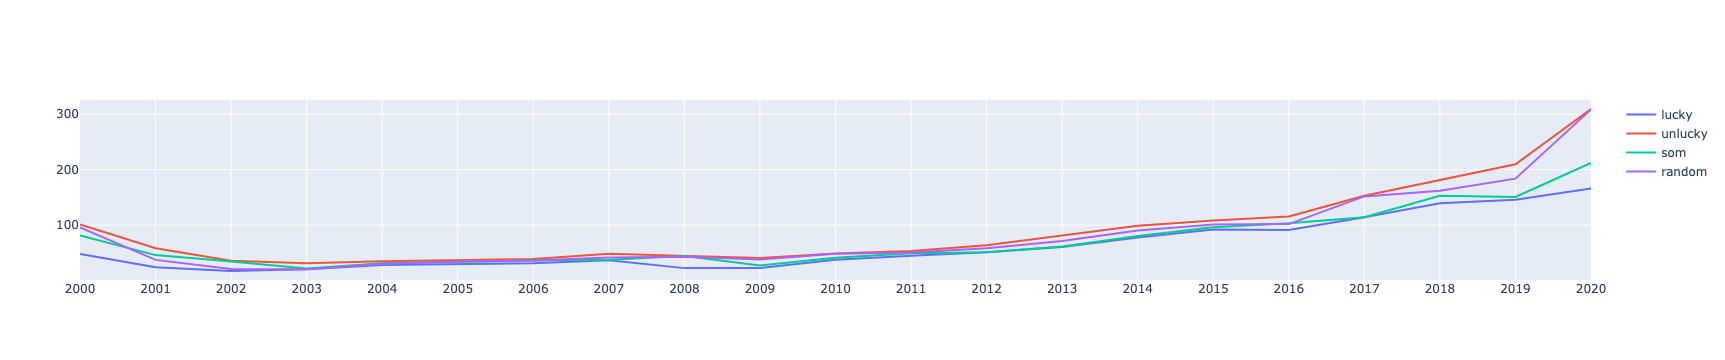

In [13]:
        
fig = go.Figure()

for investor in investors:
    fig.add_trace(go.Scatter(x=yms, y=investor.transaction_history['price'],
                             name=investor.name))
fig.update_layout(hovermode='x unified')
fig.show()

In [7]:
@interact(ticker = tickers,
          verbose=False)

def F(ticker,
      verbose):

    initial_deposit = 0
    shares_to_buy = 5
    amount_to_deposit_monthly = 1_000
    fixed_amount = amount_to_deposit_monthly

    lucky_investor = fixedAmountLuckyInvestor('lucky',initial_deposit,verbose=True)
    unlucky_investor = fixedAmountUnluckyInvestor('unlucky',initial_deposit,verbose=True)
    som_investor = fixedAmountSomInvestor('som',initial_deposit,verbose=True)
    random_investor = fixedAmountRandomInvestor('random',initial_deposit,verbose=True)
    investors = [lucky_investor,unlucky_investor,som_investor,random_investor]

    dfs = etf_stocks[ticker].rename(columns={'Close':'price'})
    dfs = dfs[dfs['Y'] <'2021']

    dfs = dfs.sort_values('date').reset_index(drop=True)
    dfs['YM'] = dfs['date'].apply(lambda v: v.strftime('%Y'))
    yms = np.sort(dfs['YM'].unique())
    pbar = tqdm(yms)
    for ym in pbar:
        pbar.set_description("Processing %s" % ym)
        dfym = dfs[dfs['YM'] == ym]

        for investor in investors:
            investor.depositMoney(amount_to_deposit_monthly)

        dfym_symbol = dfym#[dfym['symbol'] == symbol]
        if dfym_symbol.shape[0] == 0:
            continue
        for investor in investors:
            investor.buyLogic(dfym_symbol,shares=shares_to_buy,stock_amount=fixed_amount)

        symbols_and_prices = dfym.groupby(['symbol'],as_index=False)['date'].max()
        symbols_and_prices = symbols_and_prices.merge(dfym,on=['symbol','date'])
        stocks = {}
        for i,(symbol,price,date) in symbols_and_prices[['symbol','price','date']].iterrows():
            stocks[int(symbol)] = price
            stocks['date'] = date

        for investor in investors:
            investor.updatePortfolio(stocks)
            investor.calculateProfit(stocks)



    if verbose: 
        fig = go.Figure()

        for investor in investors:
            fig.add_trace(go.Scatter(x=yms, y=investor.portfolio,
                                     name=investor.name))

        fig.update_layout(hovermode='x unified')
        fig.show()   

        fig = go.Figure()

        for investor in investors:
            fig.add_trace(go.Scatter(x=yms, y=investor.transaction_history['price'],
                                     name=investor.name))
        fig.update_layout(hovermode='x unified')
        fig.show()

        for investor in investors:
            print(investor)
            print("*"*60)

    for investor in investors:    
        investor.stock_profit['total_value'] = investor.stock_profit['current_price']*investor.stock_profit['shares']
        investor.stock_profit['total_cost'] = investor.stock_profit['avg_cost']*investor.stock_profit['shares']
        investor.stock_profit['Y'] = investor.stock_profit['as_of_date'].apply(lambda v: v.strftime('%Y'))
        investor.transaction_history['Y'] = investor.transaction_history['YM'].apply(lambda v: v[:4])
        mdf = investor.transaction_history.merge(investor.stock_profit.drop(columns='symbol').rename(columns=lambda v: v+'_profit' if v in ['date','YM'] else v),on='Y')


        mdf['days'] = (mdf['as_of_date'] - mdf['date'] ).apply(lambda v: v.days)
        print("{:>7} {:>6.2f} {:>6.2f} {:>6.2f} {:>6.2f} {:>6.2f} {:>6.2f} {:>6.2f}".format(investor.name,
                                                      ((investor.stock_profit['total_value'] - investor.stock_profit['total_cost'])/investor.stock_profit['total_cost']).mean(),
                                                      ((mdf['current_price']-mdf['price'])/mdf['price']).mean(),
                                                      ((mdf['current_price']/mdf['price'])**(365/mdf['days']) - 1).mean(),
                                                      (((1+(mdf['current_price'] - mdf['price'])/mdf['price']).prod()**(1/mdf.shape[0]) - 1)*100),
                                                      (((1+(mdf['current_price'] - mdf['dca'])/mdf['dca']).prod()**(1/mdf.shape[0]) - 1)*100),                   
                                                      (((mdf['current_price']/mdf['dca']).iloc[-1])**(1/mdf.shape[0]) - 1)*100,
                                                      (((mdf['current_price']/mdf['dca']).iloc[-1])**(1/mdf.shape[0]) - 1)*100,
                                                      ((investor.stock_profit['total_value']/investor.stock_profit['total_cost']).iloc[-1]**(1/investor.stock_profit.shape[0])-1)*100                                       
                                                                         ))


interactive(children=(Dropdown(description='ticker', options=('SPY', 'IWV', 'QQQ'), value='SPY'), Checkbox(val…